# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results, how = "left", on = "Mouse ID")


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mice_count= len(combined_data["Mouse ID"].unique())
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [134]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_df
cleaned_df.to_excel("cleaned_df.xlsx", index=False)

In [12]:
# Checking the number of mice in the clean DataFrame.
mice_count= len(cleaned_df["Mouse ID"].unique())
mice_count

249

## Summary Statistics

In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drugR_summary = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    SEM=lambda x: st.sem(x, nan_policy='omit')  # Standard error of the mean
).reset_index()
drugR_summary.to_excel("drugR_summary.xlsx", index=False)
drugR_summary

,Drug Regimen,mean,median,variance,std_dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drugR_summary = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    SEM=lambda x: st.sem(x, nan_policy='omit')  # Standard error of the mean
).reset_index()
drugR_summary

,Drug Regimen,mean,median,variance,std_dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

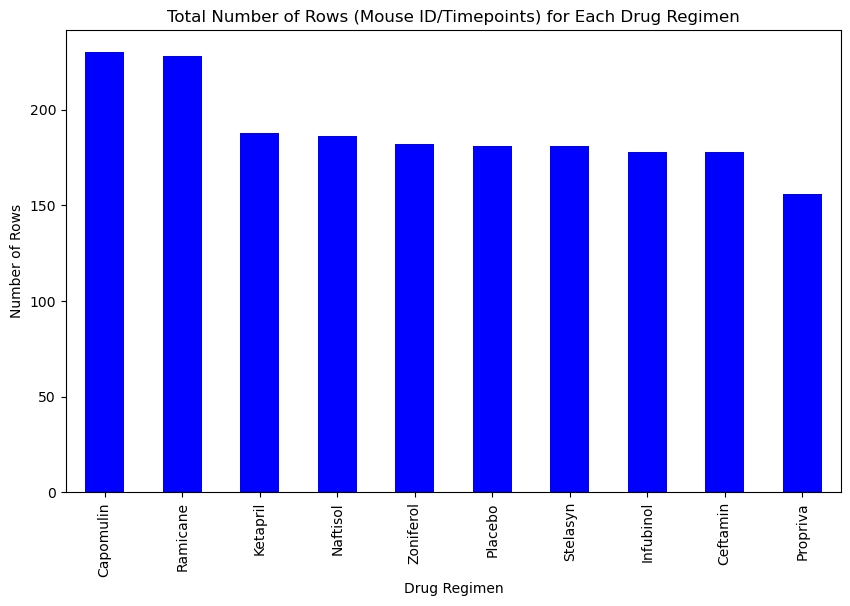

In [114]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugR_counts = cleaned_df['Drug Regimen'].value_counts()
drugR_counts.plot(kind='bar', figsize=(10, 6), color='blue')


plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.savefig("output_plot1.png")
plt.show()

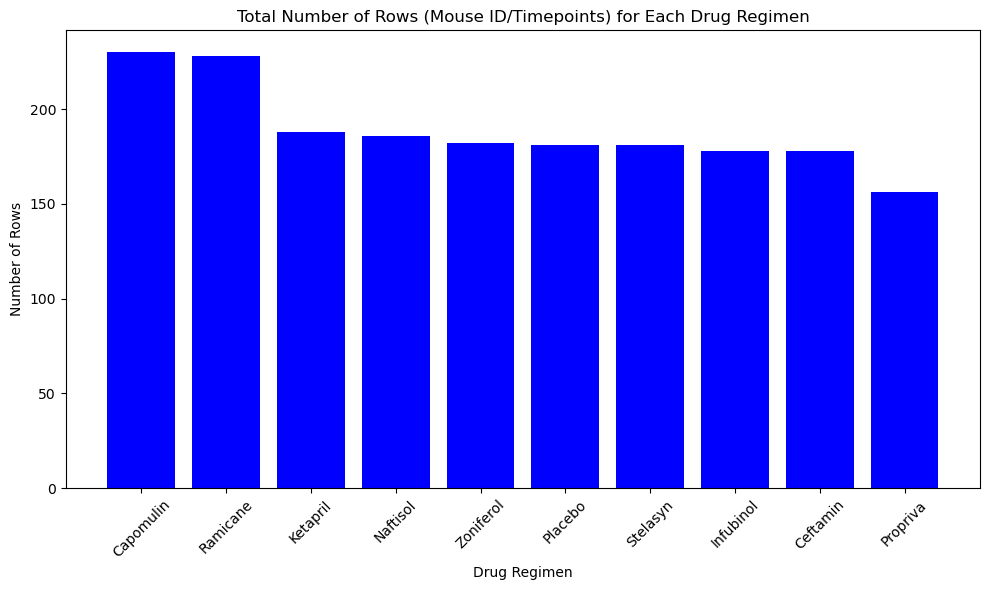

In [116]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.figure(figsize=(10, 6))
plt.bar(drugR_counts.index, drugR_counts.values, color='blue')

plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.xticks(rotation=45)

plt.savefig("output_plot2.png")
plt.tight_layout() 
plt.show()

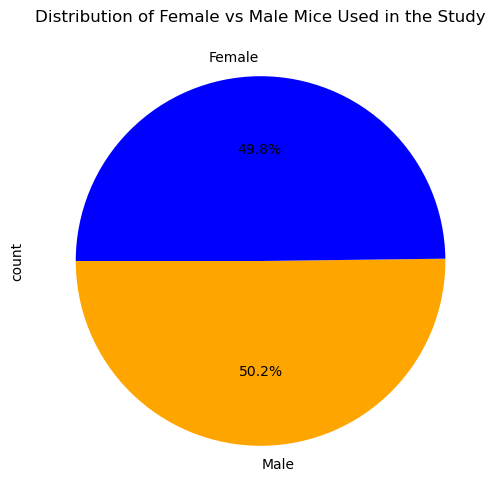

In [118]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
gender_counts = unique_mice['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=180, figsize=(6, 6), colors=['orange', 'blue'])
plt.title('Distribution of Female vs Male Mice Used in the Study')
plt.gca().set_aspect('equal')
plt.savefig("output_plot3.png")
plt.show()


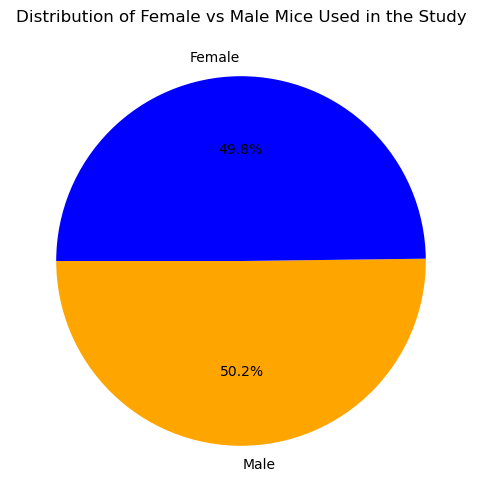

In [120]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, colors=['orange', 'blue'])

# Add title
plt.title('Distribution of Female vs Male Mice Used in the Study')

# Ensure the pie chart is a circle
plt.gca().set_aspect('equal')

# Display the plot
plt.savefig("output_plot4.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 1: Filter the DataFrame for the specified treatment regimens
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(treatment_regimens)]

# Step 2: Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 3: Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = last_timepoint.merge(filtered_df,how = "left" ,on=['Mouse ID', 'Timepoint'])

# Select relevant columns (Mouse ID, Drug Regimen, Tumor Volume)


# Display the final DataFrame
final_tumor_volume.to_excel("final_tumor_volume.xlsx", index=False)
final_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [107]:
last_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
unique_drug_regimens = final_tumor_volume['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
for regimen in unique_drug_regimens:
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    tum_vol_data.append(tumor_volumes)
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print results for each regimen
    print(f"Drug Regimen: {regimen}")
    print(f"Outliers: {outliers.tolist()}")  
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}\n")


Drug Regimen: Infubinol
Outliers: [36.3213458]
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001

Drug Regimen: Ceftamin
Outliers: []
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999

Drug Regimen: Ramicane
Outliers: []
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135

Drug Regimen: Capomulin
Outliers: []
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549



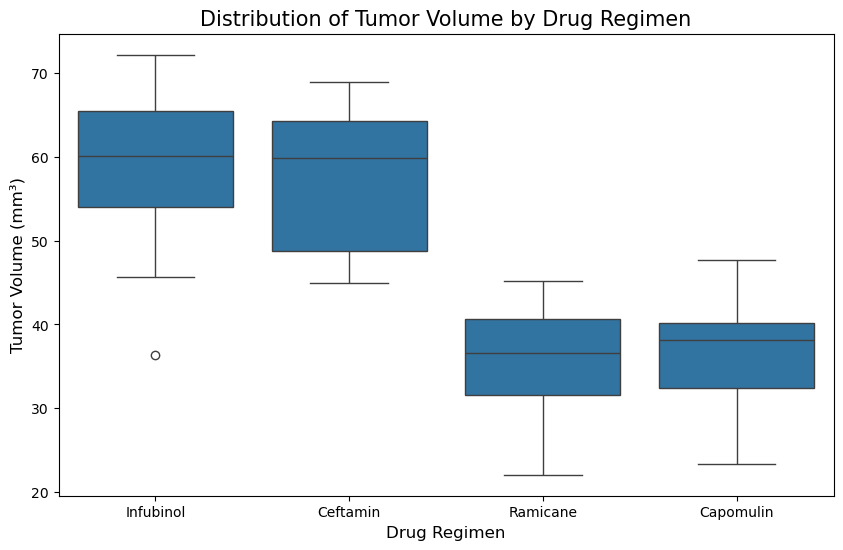

In [124]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=final_tumor_volume)

# Adding titles and labels
plt.title('Distribution of Tumor Volume by Drug Regimen', fontsize=15)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Tumor Volume (mm³)', fontsize=12)

# Show the plot
plt.savefig("output_plot5.png")
plt.show()

# Line and Scatter Plots

In [93]:
# Filter the DataFrame to only include rows where the Drug Regimen is 'Capomulin'
capomulin_mice_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Display the filtered DataFrame
capomulin_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [103]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#capomulin_mice_df
# Specify the Mouse ID to plot
cap_mouse_I509 = capomulin_mice_df[capomulin_mice_df['Mouse ID'] == 's185' ]
# Filter the DataFrame for the specified mouse and Capomulin regimen
cap_mouse_I509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


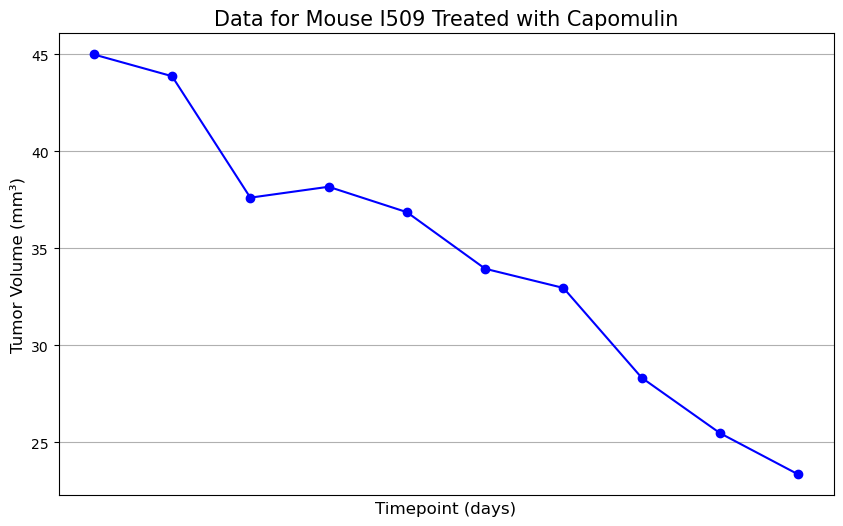

In [126]:

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(cap_mouse_I509['Timepoint'], cap_mouse_I509['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

# Adding titles and labels
plt.title(f'Data for Mouse {mouse_id} Treated with Capomulin', fontsize=15)
plt.xlabel('Timepoint (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm³)', fontsize=12)
plt.xticks(mouse_data['Timepoint'])  # Set x-ticks to match timepoints

# Show the plot
plt.savefig("output_plot6.png")
plt.grid()
plt.show()


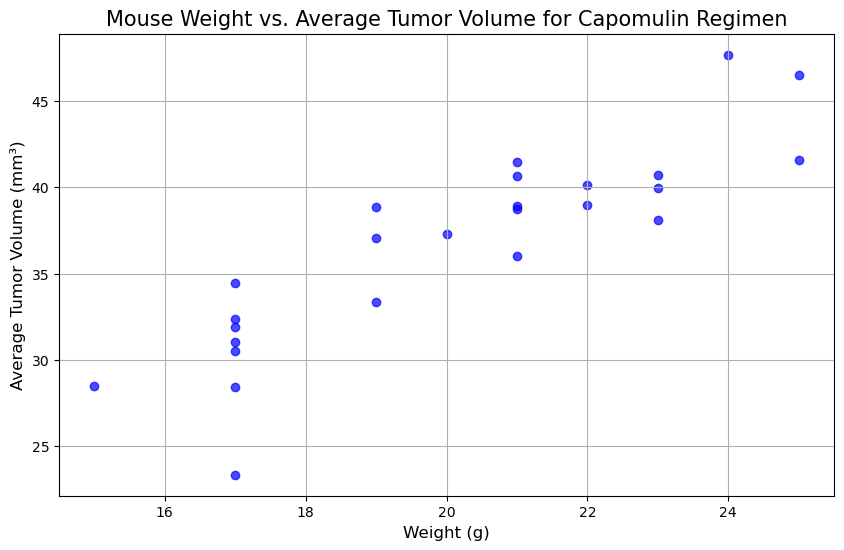

In [128]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter for Capomulin regimen
capomulin_df = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Get the weight of each mouse
weights = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge average tumor volume with mouse weights
merged_data = pd.merge(average_tumor_volume, weights, on='Mouse ID')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=15)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm³)', fontsize=12)

# Show the plot
plt.savefig("output_plot7.png")
plt.grid()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.876706040365812
Slope: 1.750468228958504
Intercept: 1.4481469525549002
R-squared: 0.7686134812139006
P-value: 9.0844290886732e-09
Standard Error: 0.20026513236453639


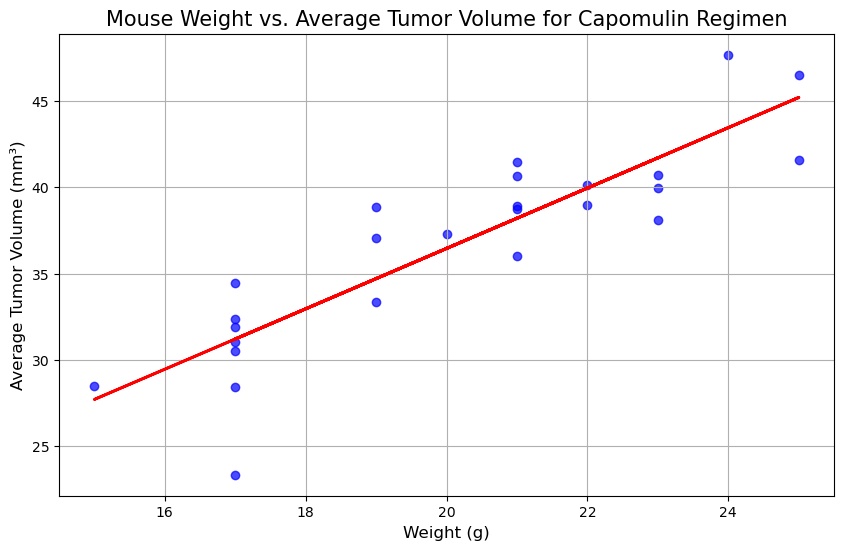

In [130]:
# Calculate the correlation coefficient and a linear regression model


# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Print regression results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')
print(f'P-value: {p_value}')
print(f'Standard Error: {std_err}')

# Create the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Calculate the regression line values
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='red', linewidth=2)

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=15)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm³)', fontsize=12)

# Show the plot
plt.savefig("output_plot8.png")
plt.grid()
plt.show()
